In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix

df = pd.read_csv('datasets/iris.csv')
X = df.drop(['species'], axis=1)
y = df['species'].astype('category')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=20)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(112, 4) (38, 4) (112,) (38,)


In [2]:
model = DecisionTreeClassifier(max_depth=2, random_state=20)
model.fit(X_train, y_train)

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",2
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",20
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current no

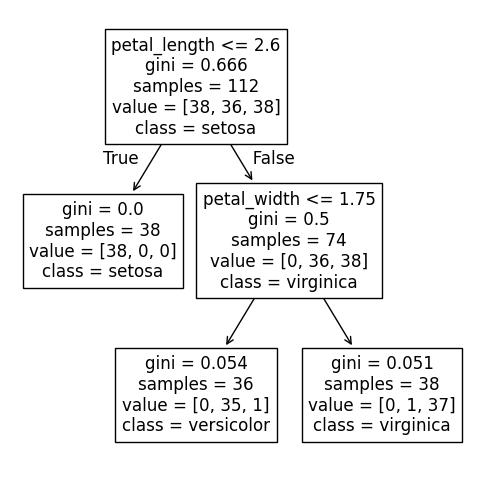

In [3]:
fig = plt.figure(figsize= (6, 6))
plot_tree(model, feature_names= X.keys(), class_names= ['setosa', 'versicolor', 'virginica'])
plt.show()

In [4]:
preds = model.predict(X_test)
confusion_matrix(y_test, preds)

array([[12,  0,  0],
       [ 0, 14,  0],
       [ 0,  4,  8]], dtype=int64)

In [5]:
data = pd.read_csv('datasets/titanic_orig.csv').dropna()
data = data.drop(columns = ['PassengerId','Name','Ticket','Cabin','Embarked'])
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
1,1,1,female,38.0,1,0,71.2833
3,1,1,female,35.0,1,0,53.1000
6,0,1,male,54.0,0,0,51.8625
10,1,3,female,4.0,1,1,16.7000
11,1,1,female,58.0,0,0,26.5500


In [6]:
pd.get_dummies(data['Sex'], dtype='int64').head()

,female,male
1,1,0
3,1,0
6,0,1
10,1,0
11,1,0


In [7]:
data['Sex'] = pd.get_dummies(data['Sex'], dtype='int64')['female']
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
1,1,1,1,38.0,1,0,71.2833
3,1,1,1,35.0,1,0,53.1000
6,0,1,0,54.0,0,0,51.8625
10,1,3,1,4.0,1,1,16.7000
11,1,1,1,58.0,0,0,26.5500


In [8]:
X = data.drop(['Survived'], axis = 1)
y = data['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=20)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(137, 6) (46, 6) (137,) (46,)


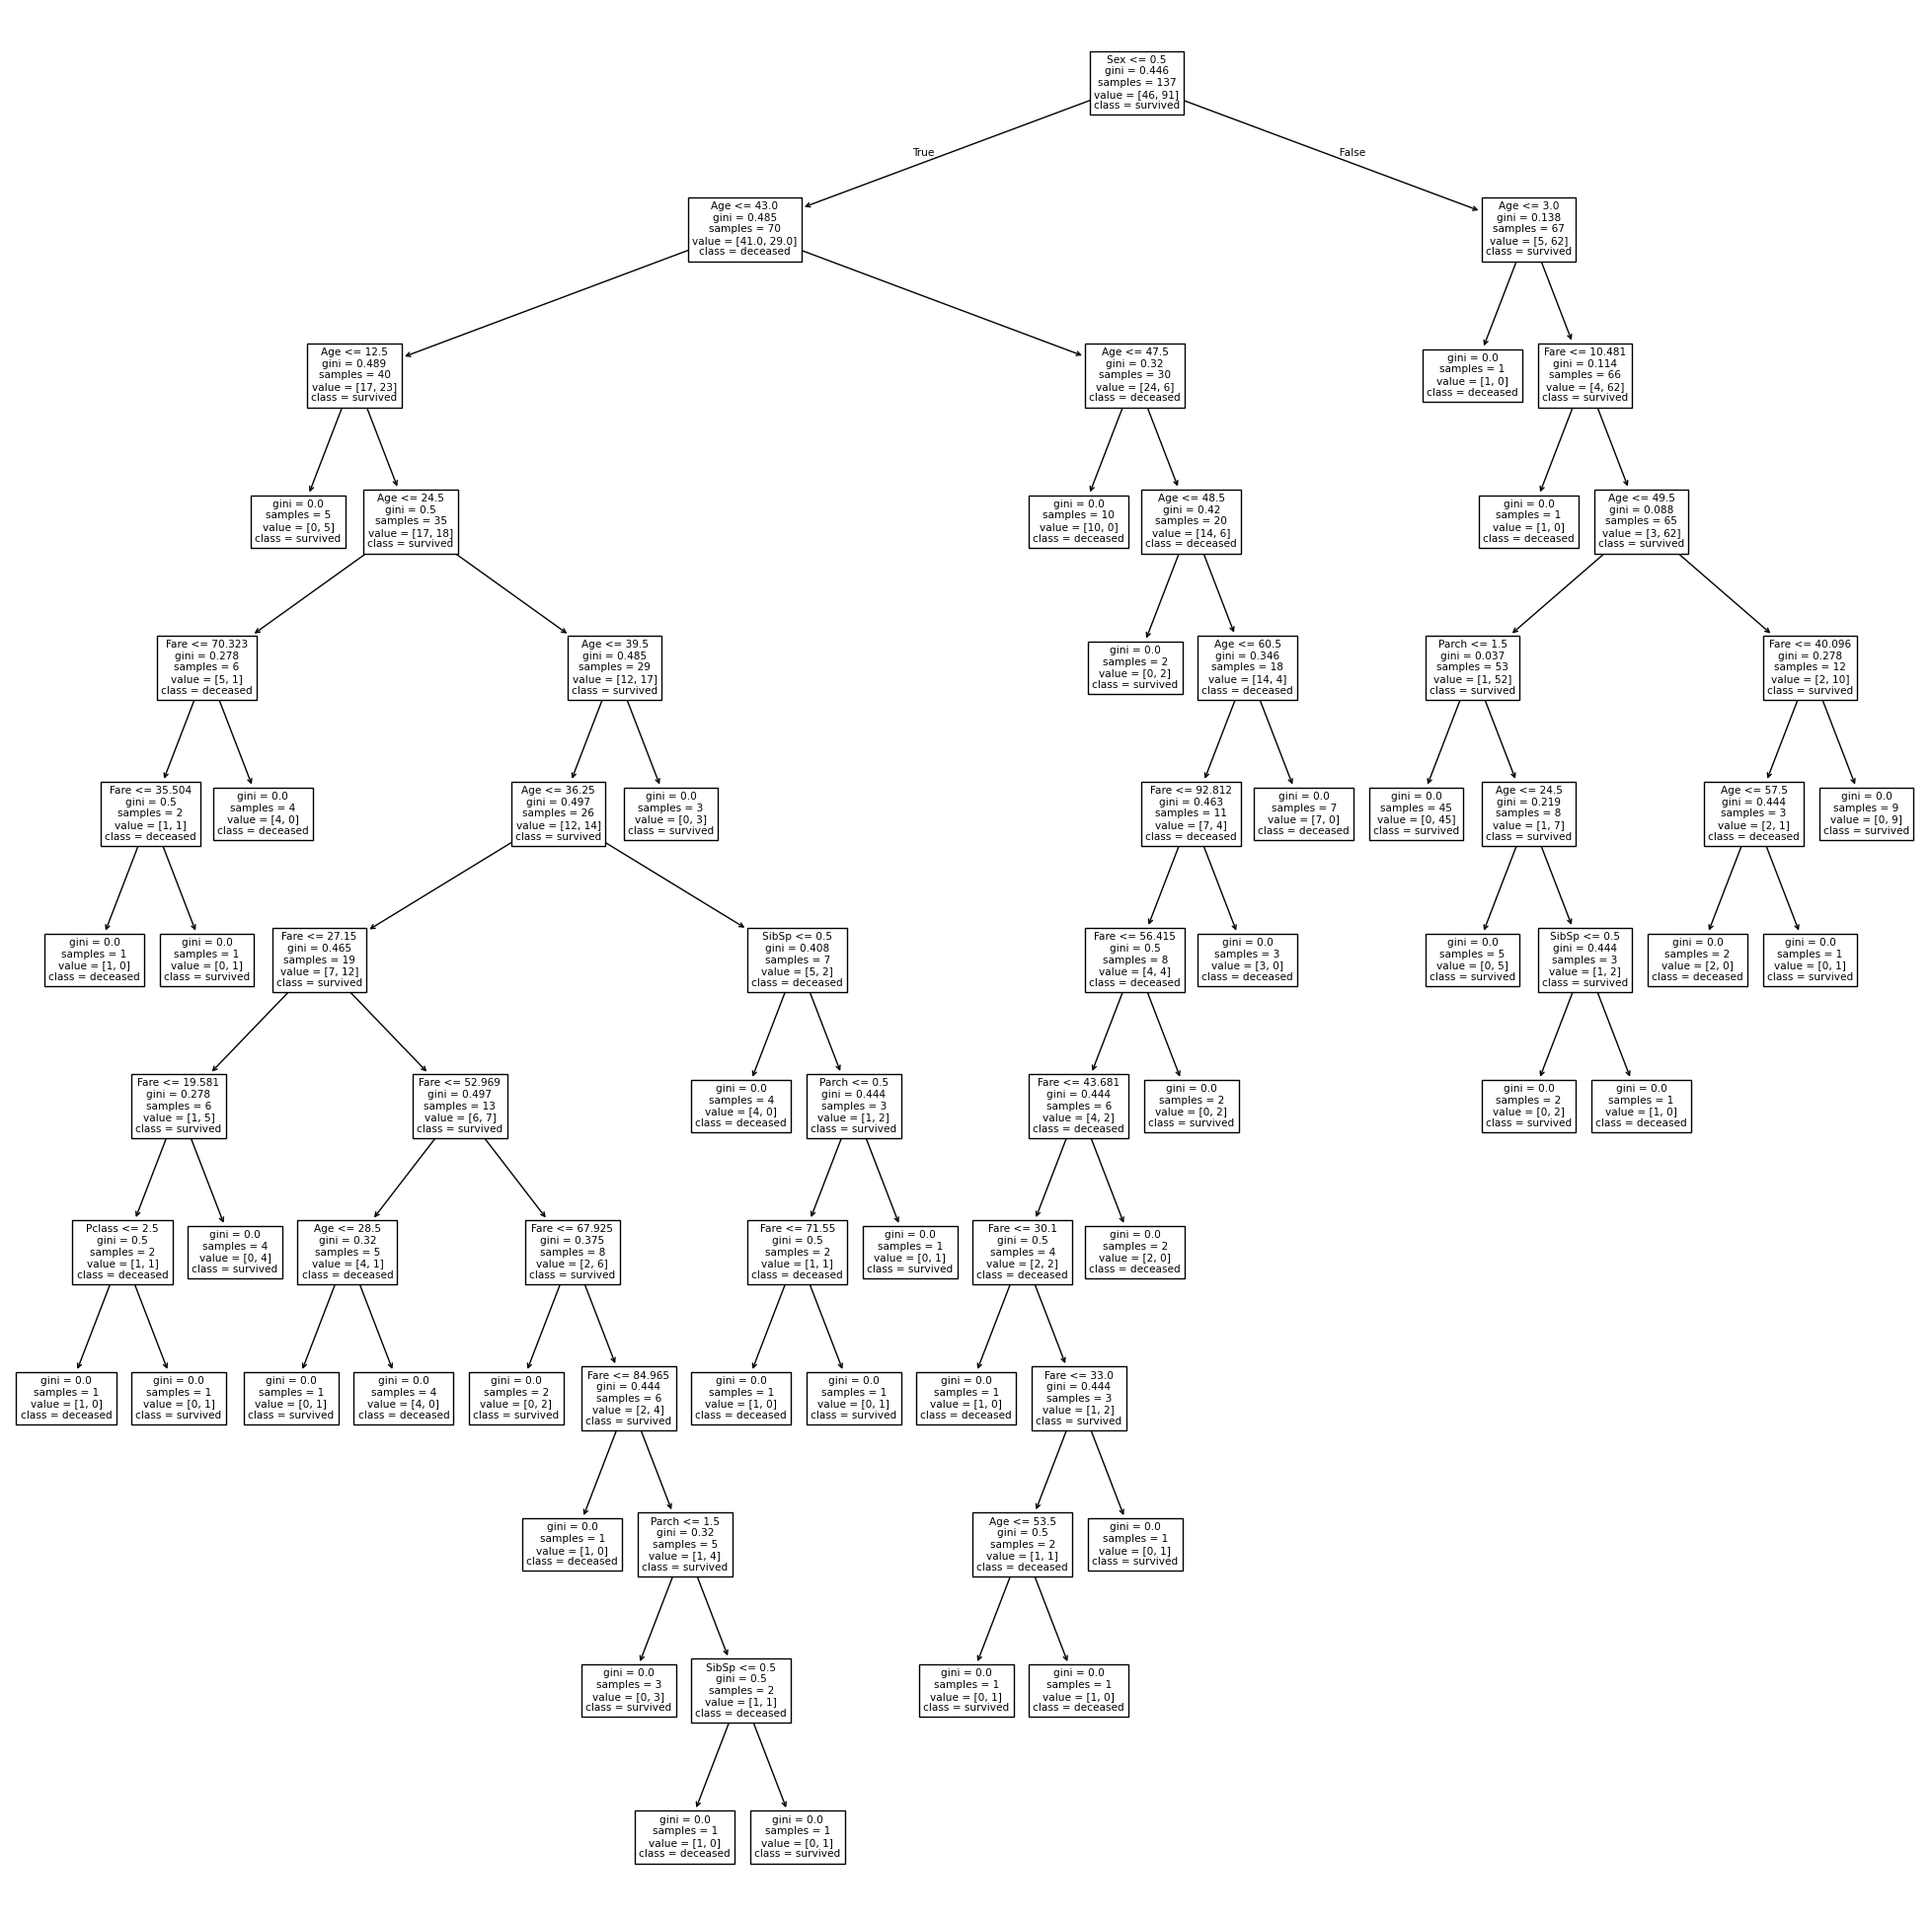

In [9]:
model = DecisionTreeClassifier(random_state=20).fit(X_train, y_train)
fig = plt.figure(figsize=(25, 25))
plot_tree(model, feature_names= X.keys(), class_names = ['deceased', 'survived'])
plt.show()

In [13]:
preds = model.predict(X_test)
confusion_matrix(y_test, preds)

array([[ 7,  7],
       [ 7, 25]], dtype=int64)

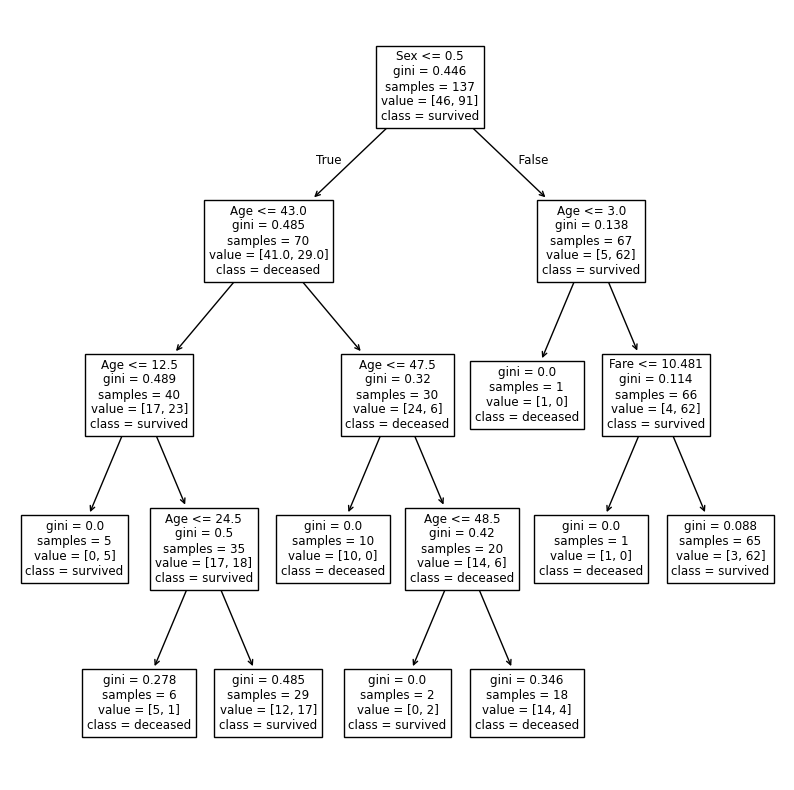

In [17]:
model_pruned = DecisionTreeClassifier(random_state=20, ccp_alpha=0.01).fit(X_train, y_train)
fig = plt.figure(figsize = (10, 10))
plot_tree(model_pruned, feature_names = X.keys(), class_names = ['deceased', 'survived'])
plt.show()

In [18]:
preds = model_pruned.predict(X_test)
confusion_matrix(y_test, preds)

array([[ 8,  6],
       [ 4, 28]], dtype=int64)